In [3]:
# IMPORT LIBRARIES
using Distributions, Turing, StatsPlots, Random, RDatasets, CSV

### Assignment 2: hierarchical models

In [4]:
# FETCH WARP BREAKS DATA SET
df = RDatasets.dataset("datasets", "warpbreaks")

54×3 DataFrame
 Row │ Breaks  Wool  Tension 
     │ Int32   Cat…  Cat…    
─────┼───────────────────────
   1 │     26  A     L
   2 │     30  A     L
   3 │     54  A     L
   4 │     25  A     L
   5 │     70  A     L
   6 │     52  A     L
   7 │     51  A     L
   8 │     26  A     L
   9 │     67  A     L
  10 │     18  A     M
  11 │     21  A     M
  ⋮  │   ⋮      ⋮       ⋮
  45 │     29  B     M
  46 │     20  B     H
  47 │     21  B     H
  48 │     24  B     H
  49 │     17  B     H
  50 │     13  B     H
  51 │     15  B     H
  52 │     15  B     H
  53 │     16  B     H
  54 │     28  B     H
              33 rows omitted

In [7]:
# DIVIDE BREAKS INTO GROUPS
breaks_a = df.Breaks[df.Wool .== "A"]
breaks_b = df.Breaks[df.Wool .== "B"]

# DIVIDE TENSION INTO GROUPS
tension_a = df.Tension[df.Wool .== "A"]
tension_b = df.Tension[df.Wool .== "B"]

# DIVIDE BREAKS GROUPS INTO GROUPS OF TENSION
breaks_a_tension_h = breaks_a[tension_a .== "H"]  # GROUP A
breaks_a_tension_m = breaks_a[tension_a .== "M"]
breaks_a_tension_l = breaks_a[tension_a .== "L"]

breaks_b_tension_h = breaks_b[tension_b .== "H"]  # GROUP B
breaks_b_tension_m = breaks_b[tension_b .== "M"]
breaks_b_tension_l = breaks_b[tension_b .== "L"]

9-element Array{Int32,1}:
 27
 14
 29
 19
 29
 31
 41
 20
 44

In [16]:
# DIVIDE PARAMETER η TO GROUP A AND GROUP B
function fetch_η(chn)
    η = Array(group(chn, :η))

    η1 = []  # GROUP A
    η2 = []  # GROUP B

    for i in eachindex(η)
        if i % 2 == 0
            push!(η1, η[i])
        else
            push!(η2, η[i])
        end
    end
    
    return η1, η2
end

# PRINT PARAMETERS
function print_parameters(name, value)
    print(name, " Mean: ", mean(value), "\n")
    print(name, " Std.: ", std(value), "\n")
end

print_parameters (generic function with 1 method)

## Problem 1: warp breaks

Infer the probability distribution of warp breaks for each of two wool types. Compare the results under separate and hierarchical models. Conduct two studies:

1. Ignore warp tension and compare wool types based on all experiments.
2. Account for warp tension in both the hierarchical model and the separate model.

#### Separate Model: Ignore wrap tension & Compare wool types based on all experiments

#### Account for warp tension in both the hierarchical model and the separate model.

The Breaks number is distributed with a Normal distribution, you can read more about it [here](https://en.wikipedia.org/wiki/Normal_distribution).

##### Here is an information regarding a Normal distribution:

Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.

Their importance is partly due to the central limit theorem. It states that, under some conditions, the average of many samples (observations) of a random variable with finite mean and variance is itself a random variable—whose distribution converges to a normal distribution as the number of samples increases. Therefore, physical quantities that are expected to be the sum of many independent processes.

Moreover, Gaussian distributions have some unique properties that are valuable in analytic studies. For instance, any linear combination of a fixed collection of normal deviates is a normal deviate. Many results and methods, such as propagation of uncertainty (and more), can be derived analytically in explicit form when the relevant variables are normally distributed.

The Breaks Number Standard deviation is Exponentially distributed, you can read more about it [here](https://en.wikipedia.org/wiki/Exponential_distribution).

##### Here is an information regarding an Exponential distribution:

In probability theory and statistics, the exponential distribution is the probability distribution of the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate. It is a particular case of the gamma distribution. It is the continuous analogue of the geometric distribution, and it has the key property of being memoryless. In addition to being used for the analysis of Poisson point processes it is found in various other contexts.

You can read more about a Poisson point processes [here](https://en.wikipedia.org/wiki/Poisson_point_process).

##### Here is an information regarding a poisson point processes:

In probability, statistics and related fields, a Poisson point process is a type of random mathematical object that consists of points randomly located on a mathematical space. The Poisson point process is often called simply the Poisson process, but it is also called a Poisson random measure, Poisson random point field or Poisson point field. This point process has convenient mathematical properties, which has led to it being frequently defined in Euclidean space and used as a mathematical model for seemingly random processes in numerous disciplines such as astronomy, biology, ecology, geology, seismology, physics, economics, image processing, and telecommunications.


In [38]:
# WOOL SEPARATE MODEL OF TOTAL BREAKS FOR EACH TYPE
@model function wool_separate(breaks)    
    μ ~ Normal(20, 5)  # μ Parameter Normally distributed
    σ ~ Exponential(2)  # σ Parameter Exponential distributed
    
    for i in eachindex(breaks)
        breaks[i] ~ Normal(μ, σ)  # Breaks number Normally distributed (by μ Parameter and σ Parameter)
    end
end

wool_separate (generic function with 1 method)

In [252]:
df.Tension

54-element CategoricalArrays.CategoricalArray{String,1,UInt8}:
 "L"
 "L"
 "L"
 "L"
 "L"
 "L"
 "L"
 "L"
 "L"
 "M"
 "M"
 "M"
 "M"
 ⋮
 "M"
 "M"
 "M"
 "H"
 "H"
 "H"
 "H"
 "H"
 "H"
 "H"
 "H"
 "H"

##### Breaks Data Groups A and B: Average and Std.

In [89]:
# AVERAGE BREAKS GROUP A
sum(breaks_a) / length(breaks_a)

31.037037037037038

In [90]:
# STD BREAKS GROUP A
std(breaks_a)

15.851429155372909

In [91]:
# AVERAGE BREAKS GROUP B
sum(breaks_b) / length(breaks_b)

25.25925925925926

In [92]:
# STD BREAKS GROUP B
std(breaks_b)

9.300920519342293

In [39]:
# CHAIN BREAKS OF TYPE A AND B
chn_a = sample(wool_separate(breaks_a), NUTS(), MCMCThreads(), 1000, 4)
chn_b = sample(wool_separate(breaks_b), NUTS(), MCMCThreads(), 1000, 4)

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC C:\Users\nitsa\.julia\packages\AbstractMCMC\Nw3Wn\src\sample.jl:228
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, true, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Info: Found initial step size
│   ϵ = 0.0015625
└ @ Turing.Inference C:\Users\nitsa\.julia\packages\Turing\PyTy2\src\inference\hmc.jl:188
┌ Info: Found initial ste

Chains MCMC chain (1000×14×4 Array{Float64,3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = μ, σ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

           μ   24.6960    1.7101     0.0270    0.0247   3588.9024    0.9994
           σ    9.0177    1.1937     0.0189    0.0205   3094.2838    0.9996

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

           μ   21.2984   23.5457   24.7052   25.8461   28.0151
           σ    7.0651    8.1530    8.8889    9.7263   11.7293


### Posterior of Breaks Types: A and B, under Separate Model, with out Wrap tension

##### Posterior Statistics of Groups A and B

In [40]:
print(
    "Posterior Statisitcs:\n\n",
    "Group A:\n",
    "μ Parameter:\n",
    "Average: ", sum(chn_a[:μ]) / length(chn_a[:μ]), "\n",
    "Std.: ", std(chn_a[:μ]),
    "\n\nσ Parameter:\n",
    "Average: ", sum(chn_a[:σ]) / length(chn_a[:σ]), "\n",
    "Std.: ", std(chn_a[:σ]), "\n\n",
    
    "Group B:\n",
    "μ Parameter:\n",
    "Average: ", sum(chn_b[:μ]) / length(chn_b[:μ]), "\n",
    "Std.: ", std(chn_b[:μ]),
    "\n\nσ Parameter:\n",
    "Average: ", sum(chn_b[:σ]) / length(chn_b[:σ]), "\n",
    "Std.: ", std(chn_b[:σ]), "\n\n"
)

Posterior Statisitcs:

Group A:
μ Parameter:
Average: 28.331366461464864
Std.: 2.470625243159198

σ Parameter:
Average: 14.606009204847464
Std.: 1.7903267304699424

Group B:
μ Parameter:
Average: 24.696024053367417
Std.: 1.7101258007532907

σ Parameter:
Average: 9.01766349574071
Std.: 1.193650263665963



##### Posterior Plotting of Groups A and B

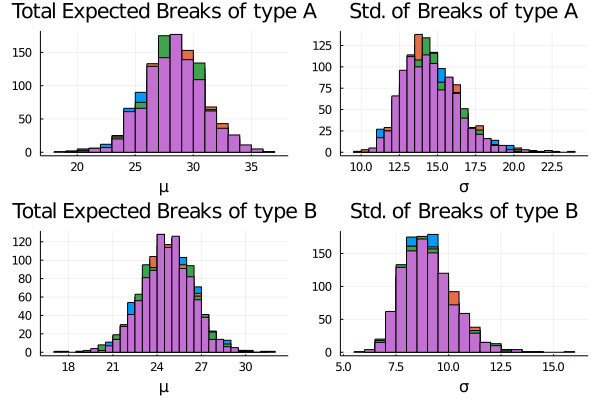

In [42]:
let
    plot(layout=4)
    histogram!(chn_a[:μ], xlabel="μ", label=missing,  subplot=1, title="Total Expected Breaks of type A")
    histogram!(chn_a[:σ], xlabel="σ", label=missing, subplot=2, title="Std. of Breaks of type A")
    histogram!(chn_b[:μ], xlabel="μ", label=missing,  subplot=3, title="Total Expected Breaks of type B")
    histogram!(chn_b[:σ], xlabel="σ", label=missing, subplot=4, title="Std. of Breaks of type B")
end

#### Account for warp tension in the hierarchical model.

The τ Hyperparameter represents a "Groups difference factor", and is Normal distributed.

The η Hyperparameter representes a "Group difference", and is Multivariate normal (MvNormal) distributed.You can read more about Multivariate normal (MvNormal) distribution [here](https://en.wikipedia.org/wiki/Multivariate_normal_distribution).

##### Here is an information regarding a Multivariate normal (MvNormal) distribution:

In probability theory and statistics, the multivariate normal distribution, multivariate Gaussian distribution, or joint normal distribution is a generalization of the one-dimensional (univariate) normal distribution to higher dimensions. One definition is that a random vector is said to be k-variate normally distributed if every linear combination of its k components has a univariate normal distribution. Its importance derives mainly from the multivariate central limit theorem. The multivariate normal distribution is often used to describe, at least approximately, any set of (possibly) correlated real-valued random variables each of which clusters around a mean value.

The σ Parameter represents the standard deviation of the Breaks Number and is LogNormal distributed.

You can read more about a LogNormal distribution [here](https://en.wikipedia.org/wiki/Log-normal_distribution).

##### Here is an information regarding a LogNormal distribution:

In probability theory, a log-normal (or lognormal) distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed. Thus, if the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution. Equivalently, if Y has a normal distribution, then the exponential function of Y, X = exp(Y), has a log-normal distribution. A random variable which is log-normally distributed takes only positive real values. It is a convenient and useful model for measurements in exact and engineering sciences, as well as medicine, economics and other topics (e.g., energies, concentrations, lengths, financial returns and other metrics).

In [11]:
# WOOL SEPARATE MODEL OF TOTAL BREAKS FOR EACH TYPE
@model function wool_hirerchial(breaks_groups)
    τ ~ Normal(1, .5)  # Groups difference factor
    
    μ ~ Normal(20, 5)  # Breaks total average
    σ ~ LogNormal(5, 1)  # Breaks total std.
    η ~ MvNormal([3, -3], 1)  # Group difference
    
    θ = μ .+ τ .* η  # Constructed Hyperparameter

    for i in eachindex(breaks_groups)
        for j in eachindex(breaks_groups[i])
            breaks_groups[i][j] ~ Normal(θ[i], σ)
        end
    end
end

wool_hirerchial (generic function with 1 method)

In [12]:
# CHAIN BREAKS HIRERCHIAL
chn = sample(wool_hirerchial([breaks_a, breaks_b]), NUTS(), MCMCThreads(), 1000, 4)

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC C:\Users\nitsa\.julia\packages\AbstractMCMC\Nw3Wn\src\sample.jl:228
┌ Info: Found initial step size
│   ϵ = 0.00625
└ @ Turing.Inference C:\Users\nitsa\.julia\packages\Turing\PyTy2\src\inference\hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.0125
└ @ Turing.Inference C:\Users\nitsa\.julia\packages\Turing\PyTy2\src\inference\hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.025
└ @ Turing.Inference C:\Users\nitsa\.julia\packages\Turing\PyTy2\src\inference\hmc.jl:188
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
Sampling (1 threads):  50%|███████████████              |  ETA: 0:00:01┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false

Chains MCMC chain (1000×17×4 Array{Float64,3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = η[1], η[2], μ, σ, τ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

        η[1]    3.0941    0.9490     0.0150    0.0145   3617.4228    0.9997
        η[2]   -2.7939    0.9519     0.0151    0.0119   4446.2256    0.9993
           μ   27.0545    1.8894     0.0299    0.0289   4138.0784    0.9996
           σ   13.4453    1.3338     0.0211    0.0244   4193.5273    1.0004
           τ    0.9866    0.3906     0.0062    0.0042   4185.8733    0.9995

Quantiles
  parameters      2.5%     25.0%    

In [70]:
# AVERAGE BREAKS
sum(df.Breaks) / length(df.Breaks)

28.14814814814815

In [71]:
# STD BREAKS
std(df.Breaks)

13.198638305132597

### Posterior of Wool Breaks, under Hirerchial Model, with out Wrap tension

##### Posterior Statistics of hirarchial model results

In [17]:
# POSTERIOR CONSTRUCTED HYPYERPARAMETER VALUE
θmean = mean(chn[:μ]) .+ mean(chn[:τ]) .* mean(Array(group(chn, :η))) # Constructed Hyperparameter
θstd = std(chn[:μ]) .+ std(chn[:τ]) .* std(Array(group(chn, :η))) # Constructed Hyperparameter

# DIVIDE PARAMETER η TO GROUP A AND GROUP B
η1, η2 = fetch_η(chn)

(Any[3.742674834147342, 3.5892004179718846, 3.3131480263922994, 3.6057926582481863, 3.600911685223622, 4.1248314846970615, 2.118597874852838, 2.4207808143289977, 2.990181156366852, 1.9514524477642807  …  -4.661406253878872, -3.1086634249977365, -2.8716193754428354, -2.2090455604871115, -4.474121692986257, -2.854779666648283, -1.527549568526567, -0.7285140804381884, -2.4008884162333426, -2.061553437193872], Any[3.268193439335383, 2.4185913758781292, 2.724375345113192, 2.276576580327505, 2.410053495683546, 3.9051834122150533, 4.392539557105085, 4.078565573746516, 3.319368551746868, 4.440215897478465  …  -4.548772044030752, -3.387515656141045, -2.705186670411248, -3.101675362870347, -3.0800163467486157, -2.239444557499512, -1.9054192470331284, -1.5548075537479273, -3.2149898033125193, -2.4756358851371236])

In [19]:
print(
    "Posterior Statisitcs:\n\n",
    "θ Hyperparameter (total average, μ .+ τ .* η):\n",
    "Average: ", θmean, "\n",
    "Std.: ", θstd,
    
    "\n\nσ Parameter (Breaks total std.):\n",
    "Average: ", sum(chn[:σ]) / length(chn[:σ]), "\n",
    "Std.: ", std(chn[:σ]), "\n\n",
    
    "τ Parameter (Groups difference factor):\n",
    "Average: ", sum(chn[:τ]) / length(chn[:τ]), "\n",
    "Std.: ", std(chn[:τ]),
    
    "\n\nμ Parameter (Breaks total average):\n",
    "Average: ", sum(chn[:μ]) / length(chn[:μ]), "\n",
    "Std.: ", std(chn[:μ]),
    
    "\n\nη Parameter (Group A difference):\n",
    "Average: ", mean(η1), "\n",
    "Std.: ", std(η1),
    
    "\n\nη Parameter (Group B difference):\n",
    "Average: ", mean(η2), "\n",
    "Std.: ", std(η2),
)

Posterior Statisitcs:

θ Hyperparameter (total average, μ .+ τ .* η):
Average: 27.202586525383175
Std.: 3.0977172575447347

σ Parameter (Breaks total std.):
Average: 13.445251425881816
Std.: 1.3338118870336368

τ Parameter (Groups difference factor):
Average: 0.9866437925716889
Std.: 0.39056929311956196

μ Parameter (Breaks total average):
Average: 27.054487851131263
Std.: 1.8893853109571

η Parameter (Group A difference):
Average: 0.14854774192899617
Std.: 3.1001930802218363

η Parameter (Group B difference):
Average: 0.15165923320615637
Std.: 3.0877223464387886

##### Posterior Plotting of the hirerchial model results

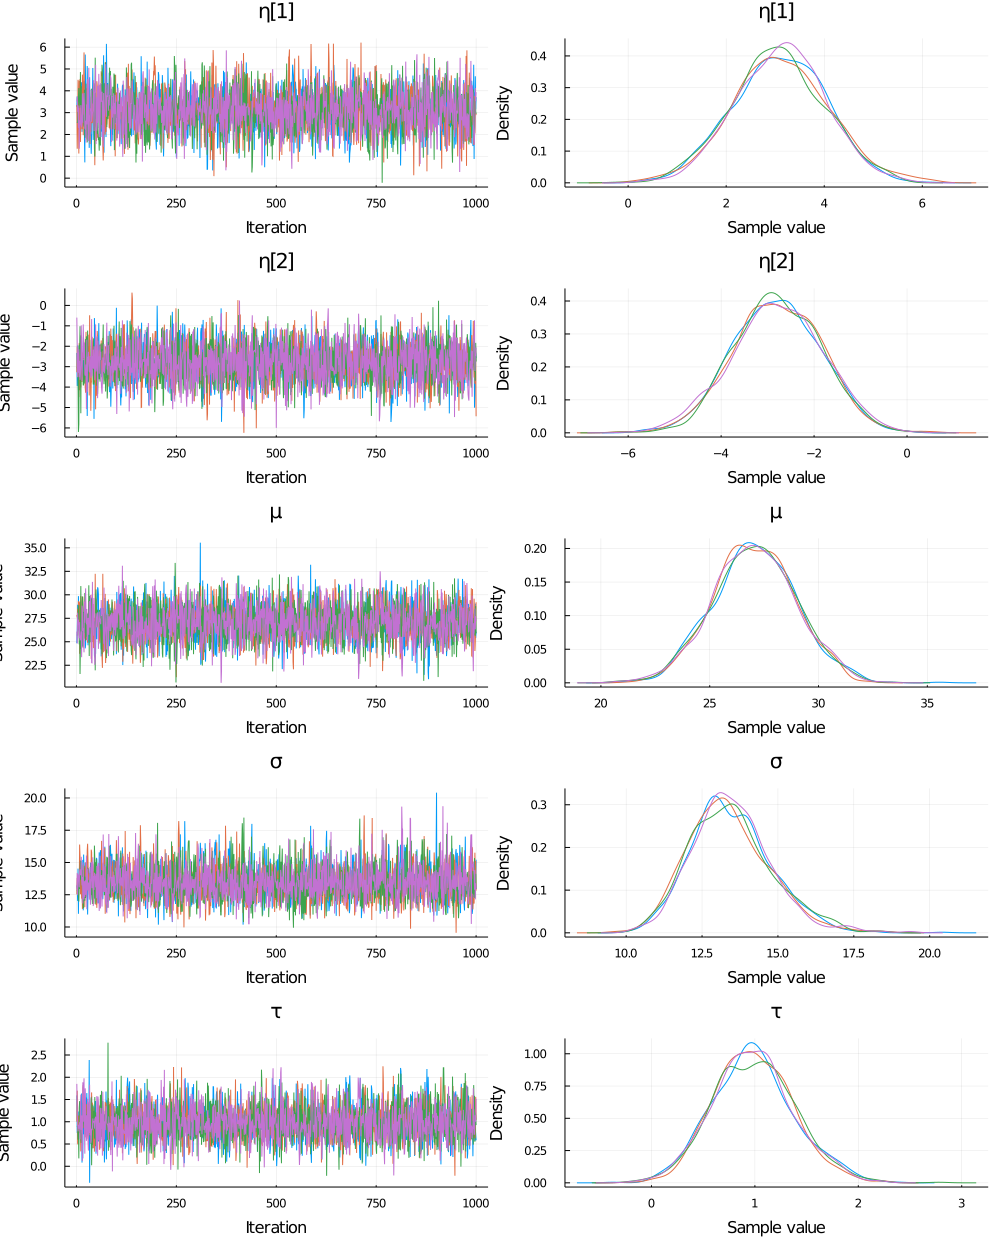

In [23]:
# PLOT CHAIN PARAMETERS
plot(chn)

#### Account for warp tension in both the hierarchical model and the separate model.


The Breaks number is distributed with a Normal distribution.

The Breaks Number Standard deviation is Exponentially distributed.

In [30]:
# WOOL SEPARATE MODEL OF TOTAL BREAKS FOR EACH TYPE WITH TENSION ACCOUNT
@model function wool_separate_tension(breaks, tension)    
    α0 ~ Normal(0, 5)  # Hyperparameter for the μ parameter
    
    αm ~ Normal(0, 5)  # Hyperparameter for the μm paramter
    αh ~ Normal(0, 5)  # Hyperparameter for the μh paramter
    
    for i in eachindex(breaks)
        μ ~ Normal(α0, 5)  # Normally distributed out of the α0 Hyperoarameter
        σ ~ Exponential(2)  # Exponentially distributed
        
        if tension[i] == "M"
            μm ~ Normal(αm, 5)  # Normally distributed out of the αm Hyperparameter
            μ += μm  # Add the μm Parameter
        elseif tension[i] == "H"
            μm ~ Normal(αm, 5)  # Normally distributed out of the αm Hyperparameter
            μh ~ Normal(αh, 5)  # Normally distributed out of the αh Hyperparameter
            μ += μm + μh  # Add the μm Parameter and the μh Parameter
        end
        
        breaks[i] ~ Normal(μ, σ)
        # Normally distributed with μ Parameter (built out of Hyperparameters)
        # And the σ Parameter (exponentially distributed)
    end
end

wool_separate_tension (generic function with 1 method)

In [25]:
# CHAIN BREAKS OF TYPE A AND B
chn_a_tens = sample(wool_separate_tension(breaks_a, tension_a), NUTS(), MCMCThreads(), 1000, 4)
chn_b_tens = sample(wool_separate_tension(breaks_b, tension_b), NUTS(), MCMCThreads(), 1000, 4)

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC C:\Users\nitsa\.julia\packages\AbstractMCMC\Nw3Wn\src\sample.jl:228
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, true, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Info: Found initial step size
│   ϵ = 0.003125
└ @ Turing.Inference C:\Users\nitsa\.julia\packages\Turing\PyTy2\src\inference\hmc.jl:188
┌ Warning: The current pro

Chains MCMC chain (1000×19×4 Array{Float64,3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = α0, αh, αm, μ, μh, μm, σ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

          α0   24.6326    1.8087     0.0286    0.0377   2150.3719    1.0005
          αh   -7.2009    2.4585     0.0389    0.0445   2409.0245    0.9993
          αm    2.0297    2.2819     0.0361    0.0507   1853.8486    1.0003
           μ   25.5088    1.6136     0.0255    0.0340   1949.9085    1.0011
          μh   -8.0226    2.1231     0.0336    0.0445   2252.6975    1.0001
          μm    2.1454    2.0993     0.033

In [26]:
# PRINT DATA STATISTICS
print(
    "breaks_a_tension_h mean: ", mean(breaks_a_tension_h), "\n",
    "breaks_a_tension_h std.: ", std(breaks_a_tension_h), "\n\n",
    
    "breaks_a_tension_m mean: ", mean(breaks_a_tension_m), "\n",
    "breaks_a_tension_m std.: ", std(breaks_a_tension_m), "\n\n",
    
    "breaks_a_tension_l mean: ", mean(breaks_a_tension_l), "\n",
    "breaks_a_tension_l std.: ", std(breaks_a_tension_l), "\n\n",
    
    "breaks_b_tension_h mean: ", mean(breaks_b_tension_h), "\n",
    "breaks_b_tension_h std.: ", std(breaks_b_tension_h), "\n\n",
    
    "breaks_b_tension_m mean: ", mean(breaks_b_tension_m), "\n",
    "breaks_b_tension_m std.: ", std(breaks_b_tension_m), "\n\n",
    
    "breaks_b_tension_l mean: ", mean(breaks_b_tension_l), "\n",
    "breaks_b_tension_l std.: ", std(breaks_b_tension_l), "\n\n",
)

breaks_a_tension_h mean: 24.555555555555557
breaks_a_tension_h std.: 10.27267140415665

breaks_a_tension_m mean: 24.0
breaks_a_tension_m std.: 8.660254037844387

breaks_a_tension_l mean: 44.55555555555556
breaks_a_tension_l std.: 18.097728525364108

breaks_b_tension_h mean: 18.77777777777778
breaks_b_tension_h std.: 4.893306085301066

breaks_b_tension_m mean: 28.77777777777778
breaks_b_tension_m std.: 9.431036233863406

breaks_b_tension_l mean: 28.22222222222222
breaks_b_tension_l std.: 9.85872428078017



In [27]:
print("Parameters Statistics (Group A):\n")
print_parameters("α0", chn_a_tens[:α0])
print("\n")
print_parameters("αh", chn_a_tens[:αh])
print("\n")
print_parameters("αm", chn_a_tens[:αm])
print("\n")
print_parameters("μ", chn_a_tens[:μ])
print("\n")
print_parameters("μh", chn_a_tens[:μh])
print("\n")
print_parameters("μm", chn_a_tens[:μm])
print("\n")
print_parameters("σ", chn_a_tens[:σ])
print("\n")

print("Parameters Statistics (Group B):\n")
print_parameters("α0", chn_b_tens[:α0])
print("\n")
print_parameters("αh", chn_b_tens[:αh])
print("\n")
print_parameters("αm", chn_b_tens[:αm])
print("\n")
print_parameters("μ", chn_b_tens[:μ])
print("\n")
print_parameters("μh", chn_b_tens[:μh])
print("\n")
print_parameters("μm", chn_b_tens[:μm])
print("\n")
print_parameters("σ", chn_b_tens[:σ])

Parameters Statistics (Group A):
α0 Mean: 33.58077569317959
α0 Std.: 2.3714957821104083

αh Mean: -0.821767957255637
αh Std.: 3.0104367802798118

αm Mean: -8.635053869427102
αm Std.: 2.9427238784265097

μ Mean: 34.83029034523547
μ Std.: 2.251105146613408

μh Mean: -0.8902074111412623
μh Std.: 2.8171094776694203

μm Mean: -9.133646817686094
μm Std.: 2.860796253908186

σ Mean: 7.2360867562403834
σ Std.: 0.4717818439209703

Parameters Statistics (Group B):
α0 Mean: 24.632587737825666
α0 Std.: 1.8087296735777014

αh Mean: -7.200919556091072
αh Std.: 2.4584685835732913

αm Mean: 2.0297057645217245
αm Std.: 2.281908557184792

μ Mean: 25.508756131238872
μ Std.: 1.6136024963593147

μh Mean: -8.02257842575814
μh Std.: 2.123136980938678

μm Mean: 2.1453632846464377
μm Std.: 2.0993163999269773

σ Mean: 5.170438763310118
σ Std.: 0.3671152082657359


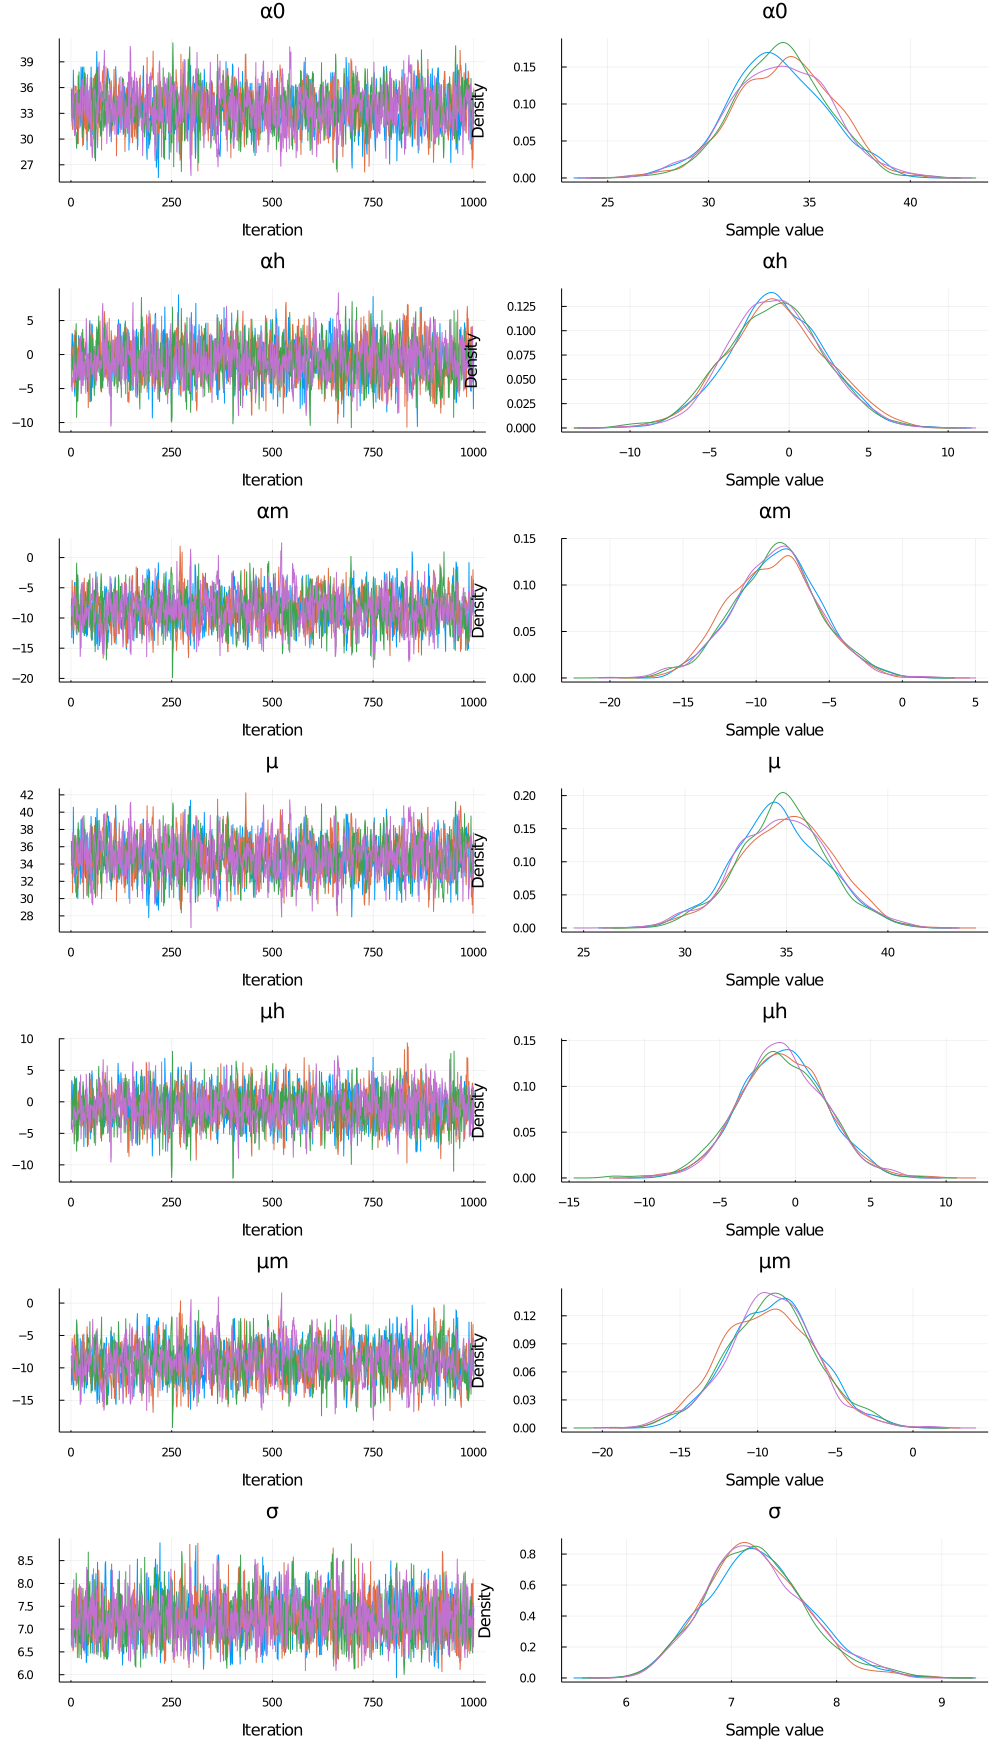

In [28]:
plot(chn_a_tens)

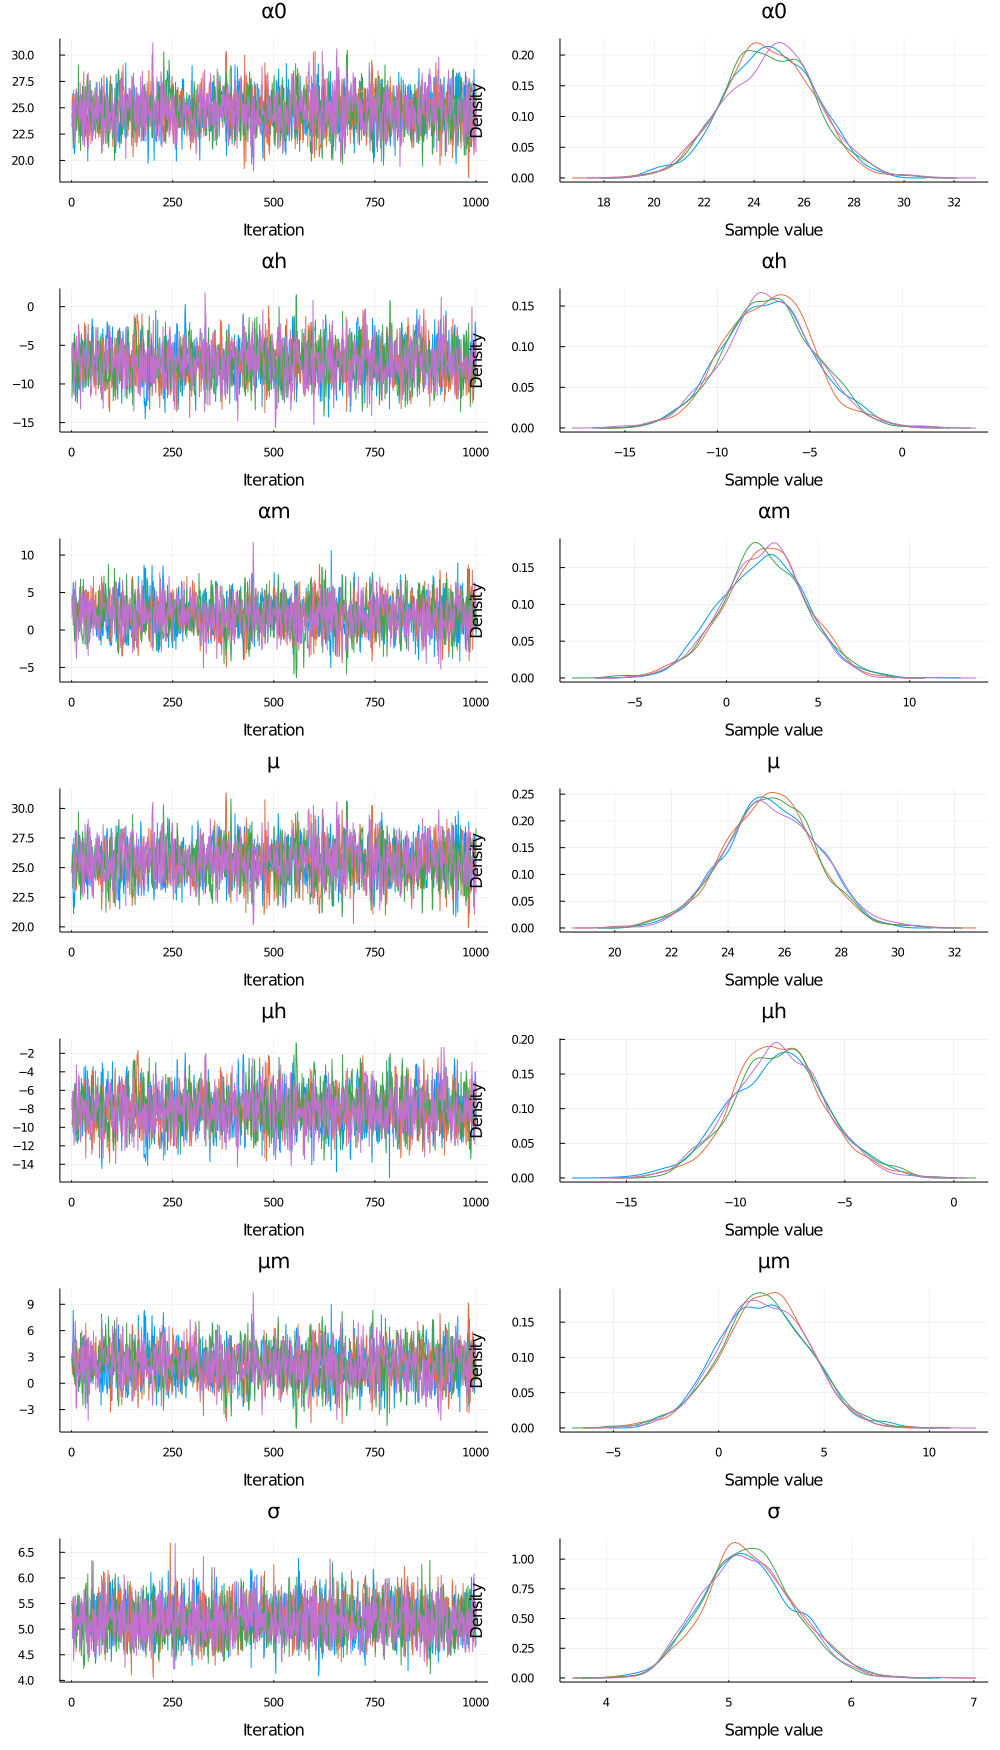

In [29]:
plot(chn_b_tens)

#### Account for warp tension in the hierarchical model.

The τ Hyperparameter represents a "Groups difference factor", and is Normal distributed.

The η Hyperparameter representes a "Group difference", and is Multivariate normal (MvNormal) distributed.You can read more about Multivariate normal (MvNormal) distribution.

The σ Parameter represents the standard deviation of the Breaks Number and is LogNormal distributed.

In [31]:
# WOOL HIERARCHIAL MODEL OF TOTAL BREAKS FOR EACH TYPE
@model function wool_hierarchial_tension(breaks_groups, tension_groups)
    τ ~ Normal(1, 5)  # Groups difference factor LogNormal Distributed
    
    μ ~ Normal(20, 5)  # Breaks total average
    σ ~ LogNormal(5, 1)  # Breaks total std.
    η ~ MvNormal([3, -3], 1)  # Group difference
    
    θ = μ .+ τ .* η  # Constructed Hyperparameter
    
    # TENSION
    αm ~ Normal(0, 5)
    αh ~ Normal(0, 5)

    for i in eachindex(breaks_groups)        
        for j in eachindex(breaks_groups[i])            
             θi = θ[i]

            if tension_groups[i][j] == "M"
                μm ~ Normal(αm, 5)  # Same logic as the "Non-Separate" Model
                θi += μm
            elseif tension_groups[i][j] == "H"
                μm ~ Normal(αm, 5)  # Same logic as the "Non-Separate" Model
                μh ~ Normal(αh, 5)  # Same logic as the "Non-Separate" Model
                θi += μm + μh
            end
            
            # TOTAL
            breaks_groups[i][j] ~ Normal(θi, σ)
        end
    end
end

wool_hierarchial_tension (generic function with 1 method)

In [32]:
# CHAIN BREAKS OF TYPE A AND B TENSION
chn_hier_tens = sample(wool_hierarchial_tension([breaks_a, breaks_b], [tension_a, tension_b]), 
    NUTS(), MCMCThreads(), 1000, 4)

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC C:\Users\nitsa\.julia\packages\AbstractMCMC\Nw3Wn\src\sample.jl:228
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Info: Found initial step size
│   ϵ = 0.0015625
└ @ Turing.Inference C:\Users\nitsa\.julia\packages\Turing\PyTy2\src\inference\hmc.jl:188
┌ Warning: The current 

Chains MCMC chain (1000×21×4 Array{Float64,3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = αh, αm, η[1], η[2], μ, μh, μm, σ, τ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

          αh   -3.6222    3.1951     0.0505    0.0761   2055.7734    1.0008
          αm   -4.4024    3.0794     0.0487    0.0604   2062.2642    1.0001
        η[1]    3.0227    0.9648     0.0153    0.0161   3982.6391    0.9995
        η[2]   -2.5604    1.0893     0.0172    0.0178   3052.7340    0.9999
           μ   30.7848    2.5732     0.0407    0.0517   2525.5548    1.0019
          μh   -3.8320    3.129

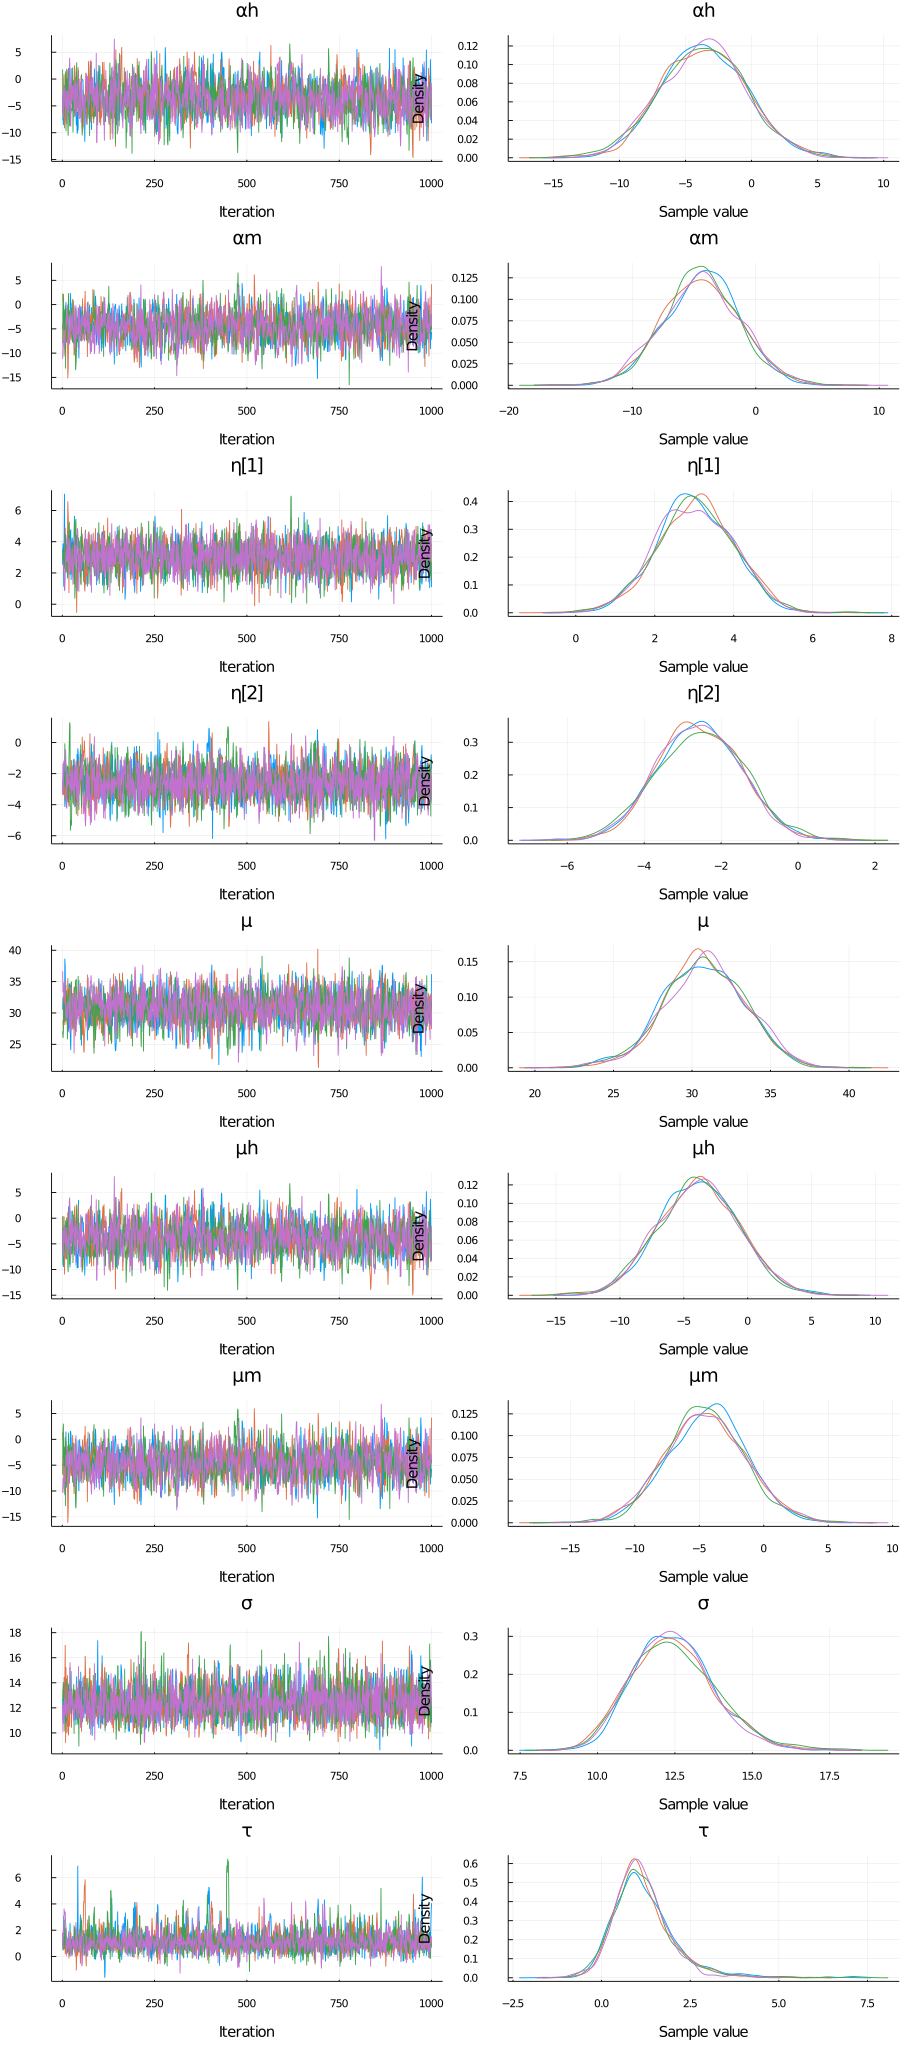

In [33]:
plot(chn_hier_tens)

In [34]:
η1, η2 = fetch_η(chn_hier_tens)

(Any[3.8893016112453473, 1.1245896913559321, 7.067039186513135, 2.3932250017726213, 2.4179524197104323, 2.244784547959974, 1.6524049497745166, 3.2494695156593822, 3.0672358280185543, 3.5924641691613974  …  -2.9552384615592575, -1.7382782973198876, -3.1072548165818534, -2.4437212647479205, -4.150558858375196, -2.526927458111186, -3.540883332585852, -1.841045957930049, -2.2178647414364416, -3.880133194039733], Any[2.530926659440694, 3.2484186303729765, 4.237876358655585, 2.711870216008818, 3.801780715152831, 3.1578280181428373, 4.228963096544986, 4.71999653018979, 3.3405411250162405, 3.100931311250037  …  -4.352681115547087, -2.6482255388169706, -2.8993949826604997, -1.7573904202886872, -2.864742677648552, -4.692083476792119, -2.528669094347998, -3.1303926460532474, -2.115730974284748, -3.8478688750939662])

In [35]:
print("Parameters Statistics:\n")
print_parameters("αh", chn_hier_tens[:αh])
print("\n")
print_parameters("αm", chn_hier_tens[:αm])
print("\n")
print_parameters("η1", η1)
print("\n")
print_parameters("η2", η2)
print("\n")
print_parameters("μ", chn_hier_tens[:μ])
print("\n")
print_parameters("μh", chn_hier_tens[:μh])
print("\n")
print_parameters("μm", chn_hier_tens[:μm])
print("\n")
print_parameters("σ", chn_hier_tens[:σ])
print("\n")
print_parameters("τ", chn_hier_tens[:τ])

Parameters Statistics:
αh Mean: -3.622167920712332
αh Std.: 3.1951240641855763

αm Mean: -4.402440972232615
αm Std.: 3.07939911917041

η1 Mean: 0.2520653134078491
η1 Std.: 2.978991258127417

η2 Mean: 0.21030359669694917
η2 Std.: 2.971797520412822

μ Mean: 30.784815603579144
μ Std.: 2.5731535421374936

μh Mean: -3.832021091004024
μh Std.: 3.1296805721361634

μm Mean: -4.496905770606946
μm Std.: 3.045165763668849

σ Mean: 12.46361049837375
σ Std.: 1.3200525275783428

τ Mean: 1.1639047593720617
τ Std.: 0.8554384738637788


## Problem 2: City of Norfolk employee salaries

City of Norfolk provides access to  [employee salary data](https://data.norfolk.gov/Government/Employee-Salaries/4fsk-z8s8).

Analyze the salary distributions.

1. by department.
2. by department and employee status.
3.  Compare the analysis under separate and hierarchical models.
4. A small number of groups are very different from the rest, how do you propose to handle the difference in the hierarchical model?

In [2]:
# FETCH DATA
employee_salaries = CSV.File("data/employee_salaries.csv") |> DataFrame

4399×7 DataFrame
  Row │ Department                      Position Title                Employee ⋯
      │ String                          String                        String   ⋯
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ CF - MacArthur Memorial         Museum Attendant              Casual P ⋯
    2 │ CF - MacArthur Memorial         Museum Attendant              Casual P
    3 │ CF - MacArthur Memorial         Museum Attendant              Permanen
    4 │ CF - MacArthur Memorial         Museum Attendant              Permanen
    5 │ CF - MacArthur Memorial         Administrative Technician     Permanen ⋯
    6 │ CF - MacArthur Memorial         Curator                       Permanen
    7 │ CF - MacArthur Memorial         Education Manager             Permanen
    8 │ CF - MacArthur Memorial         Archivist                     Permanen
    9 │ CF-Cultural&Convention Center   Ticket Seller                 Intermit ⋯
   10 │ CF-Cultural&Convention Center   Ticket Sales Supervisor       Intermit
   11 │ CFAE-Cultural Affrs/SpecEvents  Public Information Spec I     Permanen
  ⋮   │               ⋮                              ⋮                         ⋱
 4390 │ Victim Services Grant           Paralegal CWA                 Special
 4391 │ Victim Services Grant           Paralegal CWA                 Special  ⋯
 4392 │ Victim/Witness Program          Victim/Witness Prog Asst Dir  Special
 4393 │ Zoo- Operations                 Security Officer              Permanen
 4394 │ Zoo- Operations                 Security Officer              Permanen
 4395 │ Zoo-Veterinary & Wellness Camp  Zookeeper                     Permanen ⋯
 4396 │ Zoo-Veterinary & Wellness Camp  Veterinary Technician         Permanen
 4397 │ Zoo-Veterinary & Wellness Camp  Zookeeper                     Permanen
 4398 │ Zoo-Veterinary & Wellness Camp  Veterinary Technician         Permanen
 4399 │ Zoo-Veterinary & Wellness Camp  Veterinarian                  Permanen ⋯
                                                 5 columns and 4378 rows omitted

In [3]:
# FETCH COLUMNS
departments = employee_salaries[!, 1]
position = employee_salaries[!, 2]
statuses = employee_salaries[!, 3]
date_start = employee_salaries[!, 4]
date_end = employee_salaries[!, 5]
tax = employee_salaries[!, 6]
salary = employee_salaries[!, 7]

# UNIQUE DEPARTMENTS
unique_departments = unique(departments)

# AVERAGE SALARY FOR EACH DEPARTMENTS
average_salaries = []

for i in eachindex(unique_departments)
    department = unique_departments[i]
    department_indices = findall(d -> (d == department), departments)
    
    department_salary = 0
    for j in eachindex(department_indices)
        department_salary += salary[j]
    end
    
    department_salary /= length(department_indices)
    
    push!(average_salaries, department_salary)
end

In [13]:
unique_departments

165-element Array{String,1}:
 "CF - MacArthur Memorial"
 "CF-Cultural&Convention Center"
 "CFAE-Cultural Affrs/SpecEvents"
 "Cemetery Fund"
 "Circuit Court Judges"
 "City Assessor"
 "City Auditor"
 "City Clerk"
 "City Council"
 "City Manager-NCJS Adlt Com Sup"
 "City Manager-NCJS Pretrial Svc"
 "City Planning - Dir Office"
 "City Treasurer"
 ⋮
 "Utilities Engineering"
 "Utilities WasteWater"
 "Utilities Water Accounts"
 "Utilities Water Distribution"
 "Utilities Water Production"
 "Utilities Water Quality"
 "VOCA Victim Services"
 "VSTOP"
 "Victim Services Grant"
 "Victim/Witness Program"
 "Zoo- Operations"
 "Zoo-Veterinary & Wellness Camp"

In [14]:
average_salaries

165-element Array{Any,1}:
 32790.66625
    12.51
    12.51
 27683.950952380957
 26235.183
 28472.0216
 29148.58222222222
 26235.183
 28658.17285714286
 32790.66625
 32790.66625
    12.51
 29114.550000000003
     ⋮
 40843.53622222223
 50780.74098765433
 27539.228500000005
 48584.3538888889
 50972.00512195123
 29148.58222222222
    12.51
    12.51
    12.51
    12.51
    12.51
 17175.816

#### 2.1. Analyze the salary distributions by department

In [39]:
mean(average_salaries)

21703.684807196034

In [40]:
std(average_salaries)

15721.732873687766

The Average Salary of each Department is Normally distributed.

The μ Parameter represents the Average of the "The Average Salary of each Department", and is Normally distributed.

The σ Parameter represents the Standard deviation of "The Average Salary of each Department", and is Exponentailly distributed.

In [44]:
# SALARIES MODEL
# salary dist. depend on department
@model function salaries(average_salaries)
    σ ~ Exponential(100)  # Represents the Std. of the "Avg. Salary of each Dep."
    μ ~ Normal(20000, 15000)  # Represents the Avg. of the "Avg. Salary of each Dep."
    
    for i in eachindex(average_salaries)
        average_salaries[i] ~ Normal(μ, σ)  # The "Avg. Salary of each Dep." is Normally dist.
    end
end

salaries (generic function with 1 method)

In [33]:
chn_salaries = sample(salaries(average_salaries), NUTS(), MCMCThreads(), 1000, 4)

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC C:\Users\nitsa\.julia\packages\AbstractMCMC\Nw3Wn\src\sample.jl:228
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\ni

Chains MCMC chain (1000×14×4 Array{Float64,3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = μ, σ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters         mean        std   naive_se      mcse         ess      rha ⋯
      Symbol      Float64    Float64    Float64   Float64     Float64   Float6 ⋯

           μ   21706.5842   918.6173    14.5246   14.1599   3913.5940    0.999 ⋯
           σ   11986.2596   457.1164     7.2276    7.6738   3736.2793    1.000 ⋯
                                                                1 column omitted

Quantiles
  parameters         2.5%        25.0%        50.0%        75.0%        97.5% 
      Symbol      Float64      Float64      Float64      Float64      Float64 

           μ   19924.

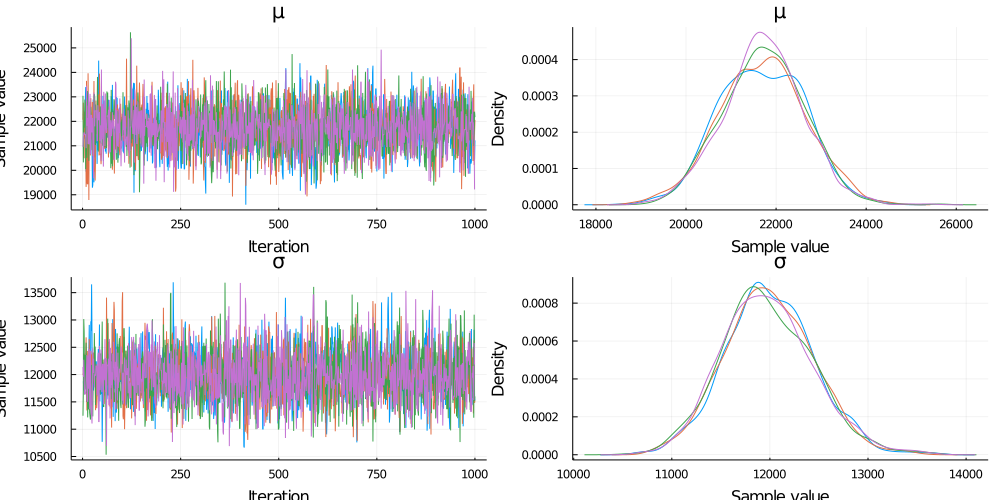

In [34]:
plot(chn_salaries)

In [36]:
print("Parameters Statistics:\n")
print_parameters("μ", chn_salaries[:μ])
print("\n")
print_parameters("σ", chn_salaries[:σ])

Parameters Statistics:
μ Mean: 21706.584204805815
μ Std.: 918.6172924451517

σ Mean: 11986.259564889453
σ Std.: 457.1163660816766


#### 2.2. Analyze the salary distributions By department and employee status

In [8]:
statuses

4399-element PooledArrays.PooledArray{String,UInt32,1,Array{UInt32,1}}:
 "Casual Part-time"
 "Casual Part-time"
 "Permanent Full-time"
 "Permanent Full-time"
 "Permanent Full-time"
 "Permanent Full-time"
 "Permanent Full-time"
 "Permanent Full-time"
 "Intermittent Temporary"
 "Intermittent Temporary"
 "Permanent Full-time"
 "Permanent Full-time"
 "Permanent Full-time"
 ⋮
 "Special Project"
 "Special Project"
 "Special Project w/ Retirement"
 "Special Project w/ Retirement"
 "Special Project w/ Retirement"
 "Permanent Full-time"
 "Permanent Full-time"
 "Permanent Full-time"
 "Permanent Full-time"
 "Permanent Full-time"
 "Permanent Full-time"
 "Permanent Full-time"

In [18]:
unique(statuses)

17-element Array{String,1}:
 "Casual Part-time"
 "Permanent Full-time"
 "Intermittent Temporary"
 "Special Project"
 "Special Project w/ Retirement"
 "Retiree Part-time"
 "Appointed by City Council"
 "Elected Official"
 "State Comp Board Retirement"
 "Constitutional OfficePart-time"
 "Permanent Part-time"
 "Special Project No Beneftis"
 "State-Special Proj-Retiremet"
 "Sheriff - Full TIme"
 "Non-City City Supplement"
 "SpecialProject PTw/Retirement"
 "Periodic Part-time"

In [4]:
# Rank Statuses By Values Manually
statuses_ranked = []

for i in eachindex(statuses)
    if statuses[i] == "Casual Part-time"  # 5
        push!(statuses_ranked, 5)
    elseif statuses[i] == "Permanent Full-time" # 16
        push!(statuses_ranked, 16)
    elseif statuses[i] == "Intermittent Temporary" # 6
        push!(statuses_ranked, 6)
    elseif statuses[i] == "Special Project" # 7
        push!(statuses_ranked, 7)
    elseif statuses[i] == "Special Project w/ Retirement" # 8
        push!(statuses_ranked, 8)
    elseif statuses[i] == "Retiree Part-time" # 9
        push!(statuses_ranked, 9)
    elseif statuses[i] == "Appointed by City Council" # 14
        push!(statuses_ranked, 14)
     elseif statuses[i] == "Elected Official" # 11
        push!(statuses_ranked, 11)
     elseif statuses[i] == "State Comp Board Retirement" # 10
        push!(statuses_ranked, 10)
     elseif statuses[i] == "Constitutional OfficePart-time" # 12
        push!(statuses_ranked, 12)
     elseif statuses[i] == "Permanent Part-time" # 15
        push!(statuses_ranked, 15)
     elseif statuses[i] == "Special Project No Beneftis" # 4
        push!(statuses_ranked, 4)
     elseif statuses[i] == "State-Special Proj-Retiremet" # 3
        push!(statuses_ranked, 3)
     elseif statuses[i] == "Sheriff - Full TIme" # 17
        push!(statuses_ranked, 17)
     elseif statuses[i] == "Non-City City Supplement" # 2
        push!(statuses_ranked, 2)
     elseif statuses[i] == "SpecialProject PTw/Retirement" # 13
        push!(statuses_ranked, 13)
     elseif statuses[i] == "Periodic Part-time" # 1
        push!(statuses_ranked, 1)
    end
end

In [22]:
unique(departments)

165-element Array{String,1}:
 "CF - MacArthur Memorial"
 "CF-Cultural&Convention Center"
 "CFAE-Cultural Affrs/SpecEvents"
 "Cemetery Fund"
 "Circuit Court Judges"
 "City Assessor"
 "City Auditor"
 "City Clerk"
 "City Council"
 "City Manager-NCJS Adlt Com Sup"
 "City Manager-NCJS Pretrial Svc"
 "City Planning - Dir Office"
 "City Treasurer"
 ⋮
 "Utilities Engineering"
 "Utilities WasteWater"
 "Utilities Water Accounts"
 "Utilities Water Distribution"
 "Utilities Water Production"
 "Utilities Water Quality"
 "VOCA Victim Services"
 "VSTOP"
 "Victim Services Grant"
 "Victim/Witness Program"
 "Zoo- Operations"
 "Zoo-Veterinary & Wellness Camp"

In [5]:
# Department Ranked D.S. Automatically
# <i> index of Unique Dep. D.S. will get <i + 1> Rank Value
departments_ranked = []
unique_departments = unique(departments)

for i in eachindex(departments)
    push!(departments_ranked, findfirst(isequal(departments[i]), unique_departments))
end

#### Pooled Salaries Model
To get the "μ" Parameter, We assume salaries average is 45K, And std. is 30K.

1. "Laplace" dist. has been chosen for salaries representation.
2. μ is the "location", department rank + status rank is the "scale".
3. "Large" tails of "Laplace" will be presenting the effect of departments and statuses on the Salary distribution.

##### TODO: Improve the "justification" + "explanation" of the Model & Distributions chose.

In [114]:
@model function salaries_pooled(salaries, departments_ranked, statuses_ranked)    
    μ ~ Normal(45000, 30000)
    
    for i in eachindex(salaries)
        salaries[i] ~ Laplace(μ, departments_ranked[i] + statuses_ranked[i])
    end
end

salaries_pooled (generic function with 1 method)

In [115]:
salaries_union_chain = sample(salaries_pooled(salary, departments_ranked, statuses_ranked), HMC(0.1, 5), 1000)

Sampling: 100%|█████████████████████████████████████████| Time: 0:00:58


Chains MCMC chain (1000×10×1 Array{Float64,3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1
Samples per chain = 1000
parameters        = μ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, n_steps, nom_step_size, step_size

Summary Statistics
  parameters        mean         std   naive_se       mcse       ess      rhat ⋯
      Symbol     Float64     Float64    Float64    Float64   Float64   Float64 ⋯

           μ   2366.2003   1358.0771    42.9462   450.1897    2.2216    2.6473 ⋯

Quantiles
  parameters       2.5%       25.0%       50.0%       75.0%       97.5% 
      Symbol    Float64     Float64     Float64     Float64     Float64 

           μ   128.0792   1188.2322   2371.9815   3540.2205   4597.0918


In [119]:
mean(departments_ranked + statuses_ranked)

93.58558763355308

In [120]:
std(departments_ranked + statuses_ranked)

46.71781983266373

In [121]:
mean(salary)

45637.20500568311

In [122]:
std(salary)

29107.66213989983

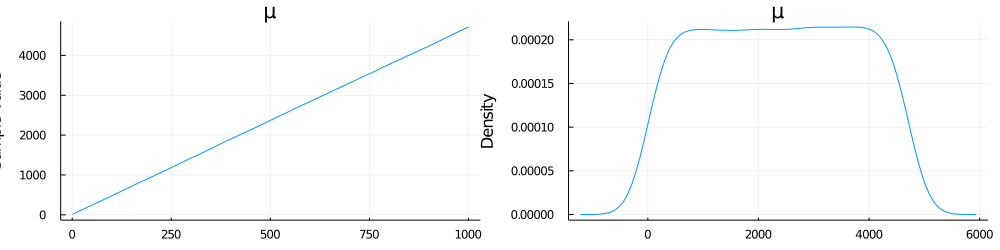

In [123]:
plot(salaries_union_chain)

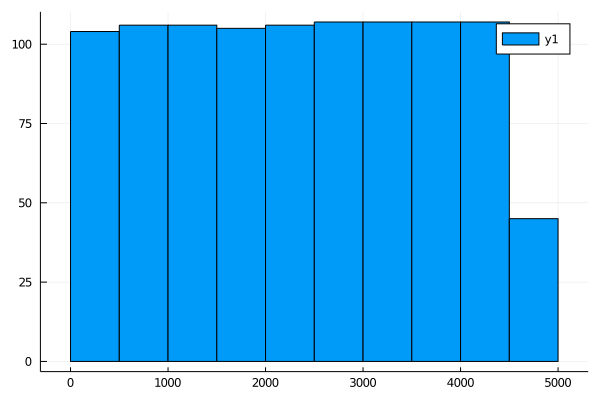

In [124]:
histogram(salaries_union_chain[:μ])

In [125]:
print("Parameters Statistics:\n")
print_parameters("μ", salaries_union_chain[:μ])

Parameters Statistics:
μ Mean: 2366.2003028392046
μ Std.: 1358.0770783057753


#### 2.2.2. Analyze the salary distributions by department and employee status (hierarchical model)


##### TODO: Same as above, and, Validate or Improve the Model if needed.

In [215]:
@model function salaries_pooled_hierarchial(salaries, departments_ranked, statuses_ranked)        
    σ1 ~ Exponential(1)
    σ2 ~ Exponential(1)
    
    for i in eachindex(salaries)        
        departments_ranked[i] ~ Normal(σ1, 5)
        statuses_ranked[i] ~ Normal(σ2, 5)
        
        salaries[i] ~ Pareto(1.16, σ1 + σ2)
    end
end

salaries_pooled_hierarchial (generic function with 1 method)

In [216]:
salaries_pooled_hierarchial_chain = sample(salaries_pooled_hierarchial(salary, departments_ranked, statuses_ranked),
    HMC(0.1, 5), 1000)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
Sampling:   0%|█                                        |  ETA: 0:01:09┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejec

Chains MCMC chain (1000×11×1 Array{Float64,3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1
Samples per chain = 1000
parameters        = σ1, σ2
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, n_steps, nom_step_size, step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse       ess      rhat 
      Symbol   Float64   Float64    Float64   Float64   Float64   Float64 

          σ1    0.1886    0.0000     0.0000    0.0000    2.6720    0.9990
          σ2    0.4253    0.0000     0.0000    0.0000    2.6720    0.9990

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%     97.5% 
      Symbol   Float64   Float64   Float64   Float64   Float64 

          σ1    0.1886    0.1886    0.1886    0.1886    0.1886
          σ2    0.4253    0.4253    0.4253    0.4253    0.4253


#### Salary ~ Pareto(α, θ)
1. α is the Shape parameter.
2. θ is the Scale paramter.

You can read more about [Pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution).

"Originally applied to describing the distribution of wealth in a society, fitting the trend that a large portion of wealth is held by a small fraction of the population."

"Only Pareto distributions with shape value (α) of log(5) (base 4) ≈ 1.16 precisely reflect it".

In [217]:
# SCALE
θ = exp(mean(salaries_pooled_hierarchial_chain[:σ1])) + exp(mean(salaries_pooled_hierarchial_chain[:σ2]))

2.7375569375771276

In [218]:
# DEPARTMENTS SCALE COMPONENT
print(
    exp(mean(salaries_pooled_hierarchial_chain[:σ1])), "\n",
    exp(std(salaries_pooled_hierarchial_chain[:σ1]))
)

1.2075221786006325
1.0000000000000002

In [219]:
# STATUSES SCALE COMPONENT
print(
    exp(mean(salaries_pooled_hierarchial_chain[:σ2])), "\n",
    exp(std(salaries_pooled_hierarchial_chain[:σ2]))
)

1.5300347589764953
1.0000000000000002

In [220]:
function array_exponent(d)
    exponent_data = []
    
    for i in eachindex(d)
        push!(exponent_data, exp(d[i]))
    end
    
    return exponent_data
end

array_exponent (generic function with 1 method)

In [221]:
array_exponent(salaries_pooled_hierarchial_chain[:σ1])

1000-element Array{Any,1}:
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 ⋮
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327
 1.2075221786006327

In [212]:
salaries_pooled_hierarchial_chain[:σ1]

2-dimensional AxisArray{Float64,2,...} with axes:
    :iter, 1:1:1000
    :chain, 1:1
And data, a 1000×1 Array{Float64,2}:
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 ⋮
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836
 0.46041791623802836

In [196]:
print("Parameters Statistics:\n")
print_parameters("σ1", salaries_pooled_hierarchial_chain[:σ1])
print("\n")
print_parameters("σ2", salaries_pooled_hierarchial_chain[:σ2])

Parameters Statistics:
σ1 Mean: 0.46041791623802897
σ1 Std.: 6.109282040500935e-16

σ2 Mean: 0.54113745366736
σ2 Std.: 6.664671316910112e-16


#### 2.2.1. Analyze the salary distributions by department (hierarchical model)


##### Note: Improve the Model, and, Add a "justifiction" + "explanation" for the Model & Distributions.

In [224]:
@model function salaries_department_hierarchial(salaries, departments_ranked)    
    μ ~ Normal(0, .5)
    α1 ~ Exponential(1)
    
    for i in eachindex(salaries)
        departments_ranked[i] ~ Normal(α1, .5)
        
        salaries[i] ~ Gumbel(μ, α1)
    end
end

salaries_department_hierarchial (generic function with 1 method)

In [ ]:
salaries_department_hierarchial_chain = sample(salaries_department_hierarchial(salary, departments_ranked) 
    , HMC(0.1, 5), 1000)

┌ Warning: Only a single thread available: MCMC chains are not sampled in parallel
└ @ AbstractMCMC C:\Users\nitsa\.julia\packages\AbstractMCMC\Nw3Wn\src\sample.jl:228
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, false, false, false)
└ @ AdvancedHMC C:\Users\ni

In [17]:
plot(salaries_department_hierarchial_chain)

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47


LoadError: [91mUndefVarError: salaries_department_hierarchial_chain not defined[39m

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47


In [18]:
print("Parameters Statistics:\n")
print_parameters("μ", salaries_pooled_hierarchial_chain[:μ])
print("\n")
print_parameters("α1", salaries_pooled_hierarchial_chain[:α1])

Parameters Statistics:


┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, t

LoadError: [91mUndefVarError: chn_salaries not defined[39m

┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, true, false, true)
└ @ AdvancedHMC C:\Users\nitsa\.julia\packages\AdvancedHMC\MIxdK\src\hamiltonian.jl:47
┌ Warning: The current proposal will be rejected due to numerical error(s).
│   isfinite.((θ, r, ℓπ, ℓκ)) = (true, t